<a href="https://colab.research.google.com/github/pmSLUMSHDS/hds5210-2023/blob/main/week13/week13_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

**PSEUDOCODE for Step #1**

importing pandas and reading in the file on telehealth trends and saved to variable telehealth

checked shape of file (19264 rows or observtions and 13 variables or columns)

In [1]:
import pandas as pd

telehealth = pd.read_csv('TMEDTREND_PUBLIC_230821.csv')
telehealth.shape

(19264, 13)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

**PSEUDOCODE for Step #2**

took a look at the file to see column headings and data overall

used a for loop....

.....to print each column name....

.....and to print the number of unique values in that column


In [2]:
telehealth

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,1,Alabama,All,All,All,Aged,All,All,321952.0,410710.0,16321.0,0.0507
1,2020,1,Alabama,All,All,All,All,0-64,All,68081.0,93955.0,5254.0,0.0772
2,2020,1,Alabama,All,All,All,All,65-74,All,163291.0,217543.0,8652.0,0.0530
3,2020,1,Alabama,All,All,All,All,75-84,All,113008.0,136957.0,5712.0,0.0505
4,2020,1,Alabama,All,All,All,All,85 and over,All,49169.0,59755.0,2178.0,0.0443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19259,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860
19260,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
19261,2023,1,Wyoming,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
19262,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765


In [3]:
for column in telehealth.columns:
    print(f"Column: {column}")
    print(telehealth[column].nunique())

Column: Year
4
Column: quarter
5
Column: Bene_Geo_Desc
56
Column: Bene_Mdcd_Mdcr_Enrl_Stus
3
Column: Bene_Race_Desc
7
Column: Bene_Sex_Desc
3
Column: Bene_Mdcr_Entlmt_Stus
4
Column: Bene_Age_Desc
5
Column: Bene_RUCA_Desc
4
Column: Total_Bene_TH_Elig
16225
Column: Total_PartB_Enrl
16363
Column: Total_Bene_Telehealth
14041
Column: Pct_Telehealth
5163


The column with the most distinct values (i.e. the largest count) is Total_PartB_Enrl with 16363 unique values.

The column with the next most distinct values (i.e. the 2nd largest count) is Total_Bene_TH_Elig with 16225 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

**PSEUDOCODE for Step #3**

made a for loop, for each column in the dataset...

....count the unique values and if the unique value is 1 (meaning there is only one distinct value)....

....then print that column name

otherwise, print all values are different.

In [4]:
for column in telehealth.columns:
    if telehealth[column].nunique() == 1:
        print(column)
    else:
        print(f'All the values for every row are different.')

All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.
All the values for every row are different.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

**PSEUDOCODE for Step #4**

My dataset has data for all 50 states for 2020-2023. So focused on the 6 races listed by state for 2023 only for ease of use.

Established the list of races

then filtered the Bene_Race_Desc column for those races and 2023

then grouped that data by race and added up all the like races to get a total for each race for the US

Then plotted imported matplotlib
and made a histogram of just the counts per race....odd looking histogram



In [5]:
races = ['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black/African American', 'Hispanic', 'Non-Hispanic White', 'Other/Unknown']

race_2023 = telehealth[(telehealth['Bene_Race_Desc'].isin(races)) & (telehealth['Year'] == 2023)]

race_totals = race_2023.groupby('Bene_Race_Desc')['Total_Bene_Telehealth'].sum().reset_index()

race_totals

,Bene_Race_Desc,Total_Bene_Telehealth
0,American Indian/Alaska Native,111573.0
1,Asian/Pacific Islander,854391.0
2,Black/African American,1694385.0
3,Hispanic,1533068.0
4,Non-Hispanic White,17202570.0
5,Other/Unknown,0.0


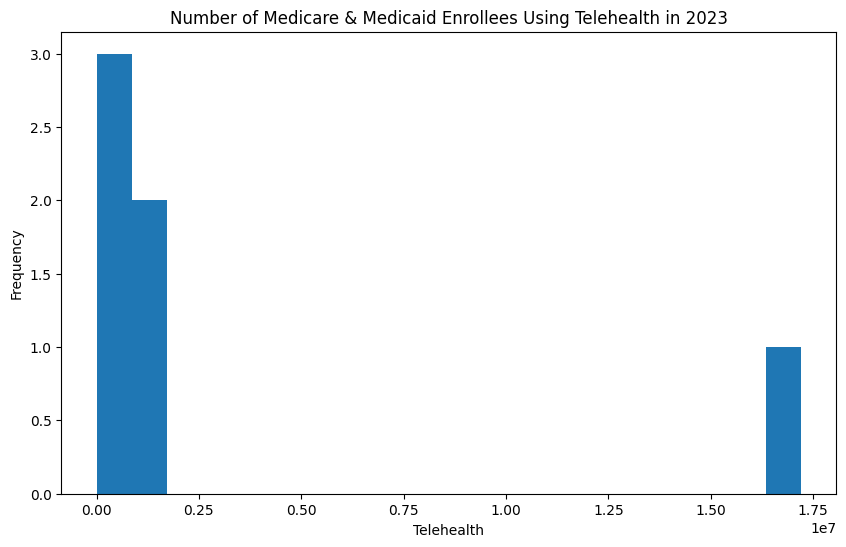

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(race_totals['Total_Bene_Telehealth'], bins=20) #played with the bins a little to try and make this look better, was expecting a column for each number I guess? The larger the bins then it splits out a little more. Not what I was expecting though.
plt.xlabel('Telehealth')
plt.ylabel('Frequency')
plt.title('Number of Medicare & Medicaid Enrollees Using Telehealth in 2023')
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

**PSEUDOCODE for Step #5**

(2023 and 2020)

Used Bard.com to figure out how to use viridis that I've used previously in R, in python....assigned to variable colors

Plotted a basic barchart, gave a figure/size

Gave the type of chart (bar), and the dataset with the 2 columns, and color to use.

labeled the x-axis, y-axis and gave a title

rotated the tick marks

show the chart

FOR PIE CHART>>>>

repeated with a piechart but left out the Other category that had zero counts (so plotted everything that did not equal 0)

was going to explode to try to keep the 2 smallest category labels from overlapping, but decided to just remove the Other category instead.

gave a figure/size

gave the tpe of graph (pie), the dataset and columns to use, use auto percent for the slices

gave it a title

show the chart

Repeated process for 2020. Non-hispanic White has the greatest telehealth use by far for both years. Roughly 80% across the US. Next nearest race is only at 7-8% for Black/African American. Huge difference in use....interesting....

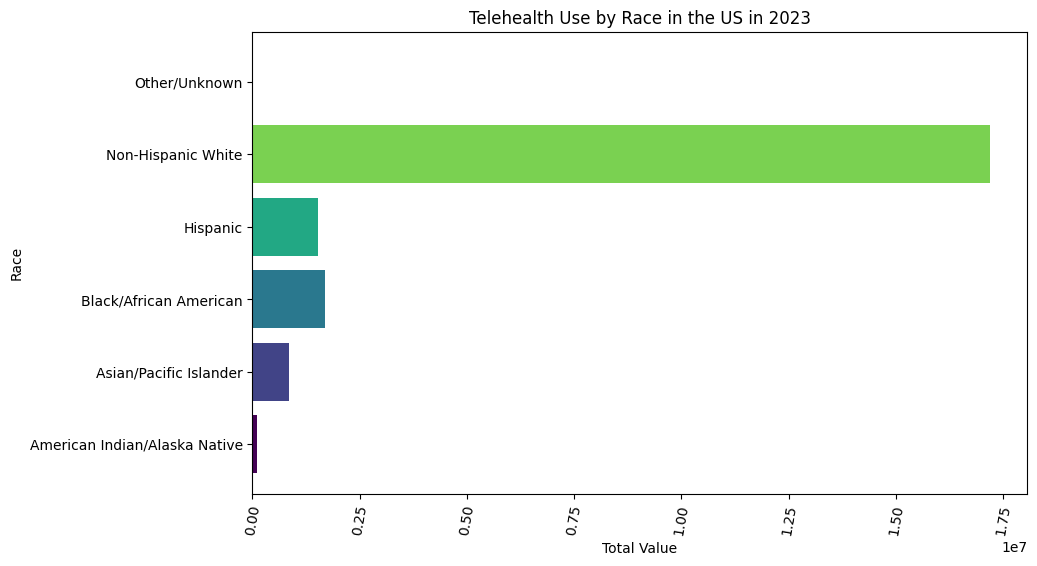

In [9]:
import numpy as np

colors = plt.cm.viridis(np.linspace(0,1, len(race_totals))) #used viridis before in R so used Bard and asked how to use viridis in python which brought up a colormap example where they assigned cmap to plt.cm.viridis.


plt.figure(figsize=(10,6))
plt.barh(race_totals['Bene_Race_Desc'], race_totals['Total_Bene_Telehealth'], color= colors)
plt.xlabel('Total Value')
plt.ylabel('Race')
plt.title('Telehealth Use by Race in the US in 2023')
plt.xticks(rotation=80)
plt.show()

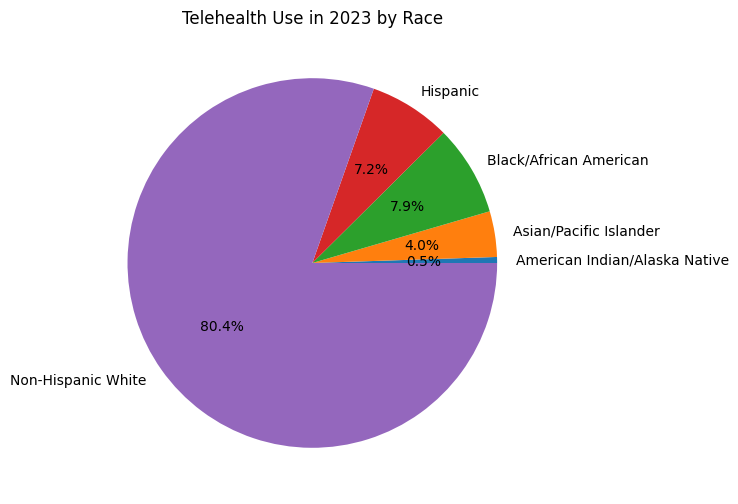

In [23]:
#explode = (0, 0, 0, 0.1, 0)
race_totals= race_totals[race_totals['Total_Bene_Telehealth'] != 0]
plt.figure(figsize=(10,6))
plt.pie(race_totals['Total_Bene_Telehealth'], labels=race_totals['Bene_Race_Desc'], autopct= '%1.1f%%') #, explode=explode)
plt.title('Telehealth Use in 2023 by Race')
plt.show()

Repeated same analysis for 2020....to compare to 2023....not so different according to this dataset....interesting....

For the final project will check out the other datasets as well. And possibly break down the numbers by state per year. Telehealth is a recent service, but will see if there are 2019 numbers. Need to delve into my data more to see how I can better show the numbers.

In [26]:
races = ['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black/African American', 'Hispanic', 'Non-Hispanic White', 'Other/Unknown']

race_2020 = telehealth[(telehealth['Bene_Race_Desc'].isin(races)) & (telehealth['Year'] == 2020)]

race_totals20 = race_2020.groupby('Bene_Race_Desc')['Total_Bene_Telehealth'].sum().reset_index()

race_totals20

,Bene_Race_Desc,Total_Bene_Telehealth
0,American Indian/Alaska Native,1759788.0
1,Asian/Pacific Islander,8876152.0
2,Black/African American,25712724.0
3,Hispanic,18553852.0
4,Non-Hispanic White,218023890.0
5,Other/Unknown,0.0


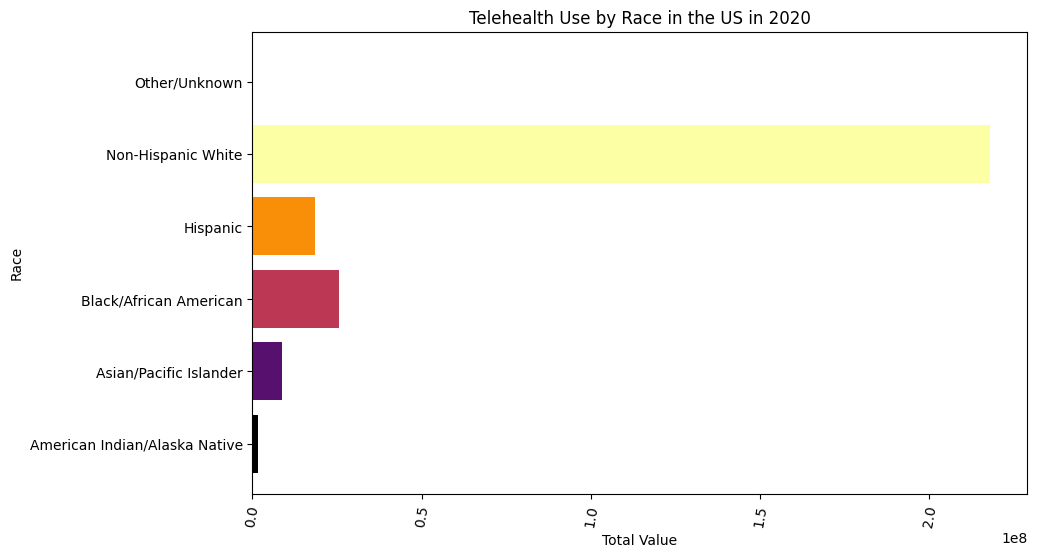

In [27]:
colors = plt.cm.inferno(np.linspace(0,1, len(race_totals)))


plt.figure(figsize=(10,6))
plt.barh(race_totals20['Bene_Race_Desc'], race_totals20['Total_Bene_Telehealth'], color= colors)
plt.xlabel('Total Value')
plt.ylabel('Race')
plt.title('Telehealth Use by Race in the US in 2020')
plt.xticks(rotation=80)
plt.show()

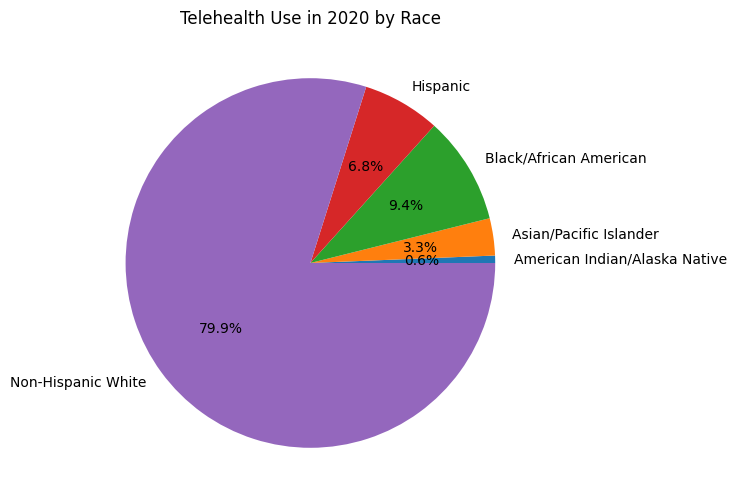

In [28]:

race_totals20= race_totals20[race_totals20['Total_Bene_Telehealth'] != 0]
plt.figure(figsize=(10,6))
plt.pie(race_totals20['Total_Bene_Telehealth'], labels=race_totals20['Bene_Race_Desc'], autopct= '%1.1f%%') #, explode=explode)
plt.title('Telehealth Use in 2020 by Race')
plt.show()



---



## Submitting Your Work

Submit your work as usual.